<a href="https://colab.research.google.com/github/mvince33/Coding-Dojo/blob/main/week10/PCA_for_Data_Visualization_Practice_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizing Clusters with Principal Component Analysis

In this exercise you will cluster credit card customer data using 8 features and visualize those clusters in a two-dimensional scatter plot.

In order to accomplish this, you will:
1. Import libraries
2. Load data [found here](https://s3.amazonaws.com/General_V88/boomyeah2015/codingdojo/curriculum/content/chapter/cust_seg.csv)
3. Drop unneeded columns
4. Explore the data and clean as needed
5. Scale the Data
6. Tune a KMeans model and cluster the scaled data using all of the features.
7. Transform the scaled data using PCA
8. Create a scatter plot of the first 2 principal components of the PCA data, colored by the labels from the KMeans model.
9. Bonus: Create a 3D scatter plot using Plotly Express scatter_3d() function using the first 3 principal components of the PCA data as the x, y, and z axes and the labels from the KMeans model as the color.

[Documentation for scatter_3d from Plotly Express](https://plotly.com/python-api-reference/generated/plotly.express.scatter_3d)

# 1. Import Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# 2. Load Data

In [2]:
df = pd.read_csv('https://s3.amazonaws.com/General_V88/boomyeah2015/codingdojo/curriculum/content/chapter/cust_seg.csv')

df.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


# 3. Drop Unnecessary Columns

In [3]:
# Drop the Unnamed: 0 and Customer Id columns
df.drop(columns = ['Unnamed: 0', 'Customer Id'], inplace = True)
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,6.3
1,47,1,26,100,4.582,8.218,0.0,12.8
2,33,2,10,57,6.111,5.802,1.0,20.9
3,29,2,4,19,0.681,0.516,0.0,6.3
4,47,1,31,253,9.308,8.908,0.0,7.2


# 4. EDA and Cleaning

In [4]:
# Check for duplicates and missing values
print('Duplicates:', df.duplicated().sum())
print('Missing Values:', df.isna().sum().sum())

Duplicates: 0
Missing Values: 150


In [5]:
# We will drop the missing values
df.dropna(inplace = True)
df.isna().sum().sum()

0

# 5. Scale Data

In [7]:
# Scale the data
scaled_df = StandardScaler().fit_transform(df)

# 6. Tune a KMeans Model and Cluster the Scaled Data Using All Features

In [11]:
# Tune a KMeans model using inertias and silhouette scores
inertias = []
sils = []
ks = range(2, 11)
for k in ks:
  kmeans = KMeans(n_clusters = k)
  kmeans.fit(scaled_df)
  inertias.append(kmeans.inertia_)
  sils.append(silhouette_score(scaled_df, kmeans.labels_))

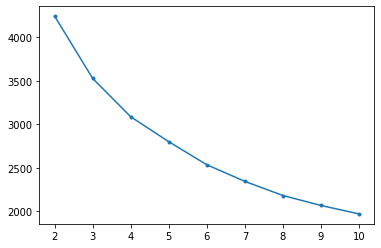

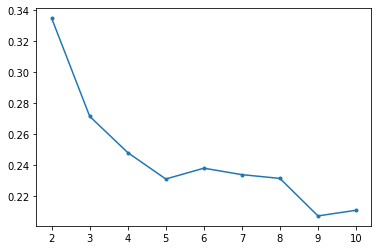

In [15]:
# Plot the scores
plt.plot(ks, inertias, marker = '.');
plt.show();
plt.plot(ks, sils, marker= '.');

In [17]:
# We will choose 3 clusters based on the above graphs
kmeans = KMeans(n_clusters = 3)
kmeans.fit(scaled_df)

KMeans(n_clusters=3)

# 7. Transform the Scaled Data with PCA

In [22]:
# Transform the scaled data with PCA
pca = PCA(n_components = 2)
pca = pca.fit_transform(scaled_df)

# 8. Plot the Clusters

- The x axis should be the first principal component, you can extract this from the PCA array with `pca_data[:, 0]`

- The y axis should be the second principal component, you can extract this from the PCA array with `pca_data[:, 1]`

- The `c` argument should be the labels from the kmeans model.

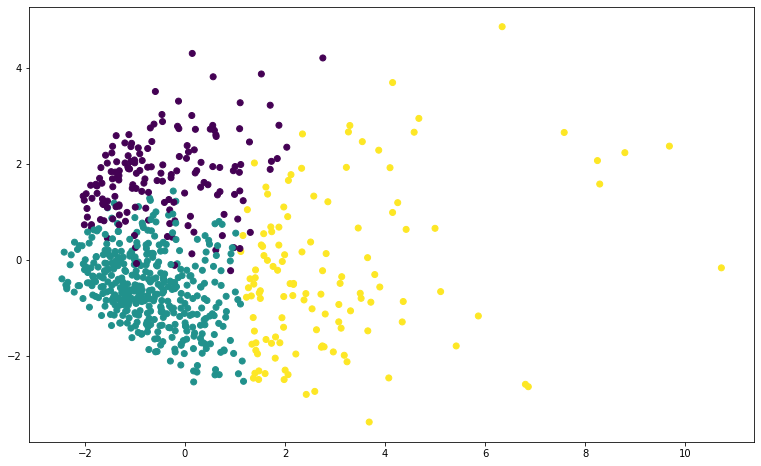

In [25]:
plt.figure(figsize = (13, 8));
plt.scatter(pca[:, 0], pca[:, 1], c = kmeans.labels_);

# 9. BONUS Plot 3 components with Plotly Express

x, y, and z should be the first 3 components and color should be the KMeans model clusters.

[scatter_3d documentation](https://plotly.com/python-api-reference/generated/plotly.express.scatter_3d)

In [29]:
# Build a PCA with 3 components
pca = PCA(n_components = 3)
pca = pca.fit_transform(scaled_df)
px.scatter_3d(x = pca[:, 0], y = pca[:, 1], z = pca[:, 2], color = kmeans.labels_)